In [12]:
# Importation des bibliothèques nécessaires
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

Les Quatre Chevelures
Problème : Quatre personnes (Alice, Bob, Charlie, Dalia) sont disposées en file sur des podiums de tailles différentes. La couleur de leurs cheveux est teinte aléatoirement en orange ou indigo. Chaque personne peut voir les chevelures devant elle et ne peut prononcer qu'un seul mot : orange ou indigo.

Le défi : Quelle stratégie les participants doivent-ils adopter pour déterminer l'ensemble des couleurs avec la plus grande probabilité ?

Réponse : Si une personne voit un nombre pair de cheveux indigo, elle dit "orange", sinon elle dit "indigo".

In [13]:
# Création du circuit quantique
problem_qc = QuantumCircuit(8)

In [14]:
# Initialisation des qubits avec une superposition égale de |0⟩ et |1⟩
problem_qc.h(0)
problem_qc.h(1)
problem_qc.h(2)
problem_qc.h(3)


In [15]:
# Barrière pour séparer les différentes étapes du circuit
problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)

In [16]:
# Implémentation des portes CX pour encoder l'information
problem_qc.cx(1, 4)
problem_qc.cx(2, 4)
problem_qc.cx(3, 4)


In [17]:
problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)


In [18]:
problem_qc.cx(4, 5)
problem_qc.cx(4, 6)
problem_qc.cx(4, 7)

In [19]:

problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)

problem_qc.cx(2, 5)
problem_qc.cx(3, 5)

problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)

problem_qc.cx(5, 6)
problem_qc.cx(5, 7)

problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)

problem_qc.cx(3, 6)

problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)

# Cette porte CX ajoute une corrélation entre les qubits 6 et 7.
problem_qc.cx(6, 7)

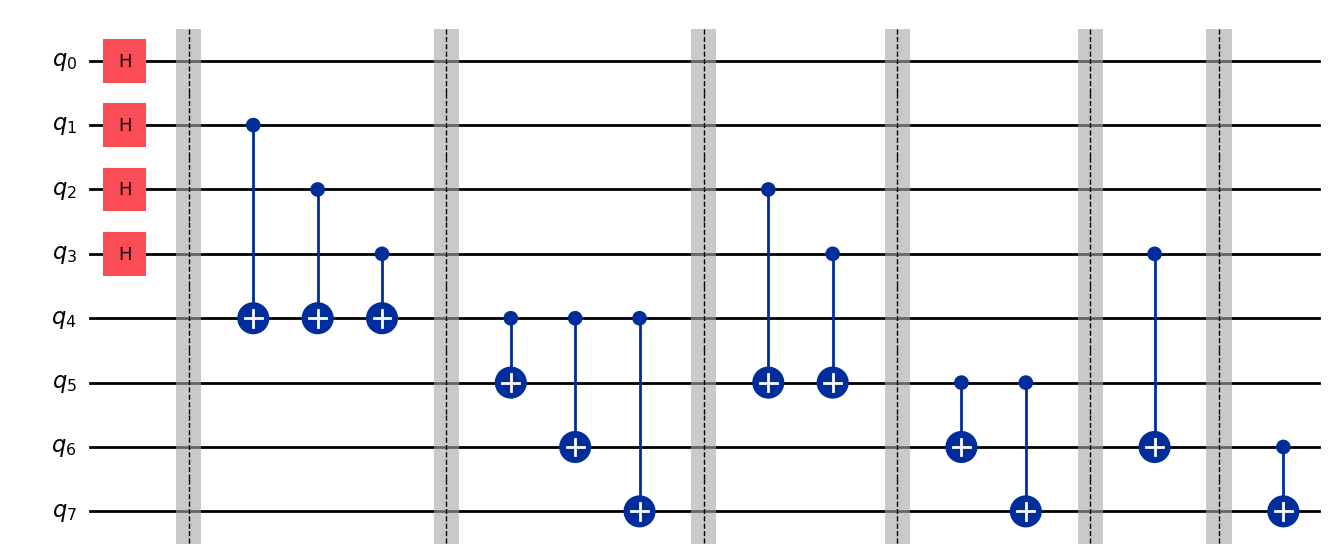

In [20]:
# Dessiner le circuit
problem_qc.draw(output='mpl', style='iqp')

In [24]:
# Utilisation du simulateur Aer pour exécuter le circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(problem_qc, simulator)
qobj = assemble(compiled_circuit)
result = execute(compiled_circuit, simulator).result()

In [25]:
# Affichage des résultats
counts = result.get_counts()
plot_histogram(counts)

QiskitError: 'No counts for experiment "0"'